<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/(Simple)Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#creat a simple toy dataset
hours_studied = np.array([2,3,4,5,7,9,10,3,4])
pass_exam = np.array([0,0,1,1,1,1,1,0,1])

df = pd.DataFrame({'hours_studied':hours_studied, 'pass_exam':pass_exam})
df

,hours_studied,pass_exam
0,2,0
1,3,0
2,4,1
3,5,1
4,7,1
5,9,1
6,10,1
7,3,0
8,4,1


In [ ]:
#creat model and fit the model and find intercept and coefficient
model = LogisticRegression()
model.fit(df[['hours_studied']],df['pass_exam'])

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [-4.17792337]
Coefficient: [[1.19772524]]


In [ ]:
#Predict probability for a range of study hours:
hours_grid = np.linspace(0,10,150)  # this will a list of 150 elements each between 0 to 10
df_grid = pd.DataFrame({'hours_studied':hours_grid})
pass_prob = model.predict_proba(df_grid[["hours_studied"]])[:, 1]
pass_prob

array([0.01509884, 0.01634201, 0.0176857 , 0.01913772, 0.02070645,
       0.02240082, 0.02423041, 0.02620543, 0.02833676, 0.03063598,
       0.03311539, 0.03578806, 0.03866781, 0.04176925, 0.04510777,
       0.04869957, 0.05256163, 0.05671171, 0.06116831, 0.06595064,
       0.07107856, 0.0765725 , 0.08245341, 0.08874257, 0.09546153,
       0.10263191, 0.11027521, 0.11841262, 0.12706476, 0.13625137,
       0.14599109, 0.15630105, 0.16719655, 0.17869071, 0.19079402,
       0.20351399, 0.21685472, 0.23081654, 0.24539559, 0.26058353,
       0.27636721, 0.29272844, 0.30964379, 0.32708458, 0.34501676,
       0.36340115, 0.38219353, 0.40134504, 0.42080257, 0.44050928,
       0.46040529, 0.48042827, 0.50051433, 0.52059873, 0.54061676,
       0.56050456, 0.58019996, 0.59964317, 0.61877755, 0.6375502 ,
       0.65591247, 0.67382041, 0.69123508, 0.70812273, 0.72445491,
       0.7402085 , 0.75536555, 0.76991317, 0.78384325, 0.79715217,
       0.80984044, 0.82191236, 0.83337559, 0.84424079, 0.85452

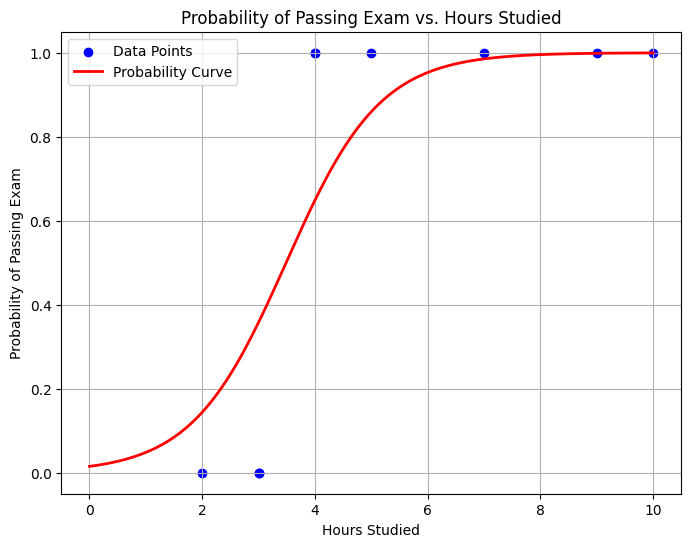

In [ ]:
#PLot datapoint and probability curve:
plt.figure(figsize=(8, 6))
plt.scatter(df['hours_studied'], df['pass_exam'], color='blue', label='Data Points')
plt.plot(df_grid['hours_studied'], pass_prob, color='red', linewidth=2, label='Probability Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing Exam')
plt.title('Probability of Passing Exam vs. Hours Studied')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predict for a Example of some students
example_hours = np.array([[2],[4],[6],[8]])
example_pass_prob = model.predict_proba(example_hours)[:, 1]
example_pred_class = model.predict(example_hours)

example_result_df = pd.DataFrame(
    {
        'Hours_Studied': example_hours.flatten(),
        'Probability_of_Passing': example_pass_prob,
        'Predicted_Class': example_pred_class
    }
)

example_result_df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Hours_Studied,Probability_of_Passing,Predicted_Class
0,2,0.143998,0
1,4,0.648620,1
2,6,0.952953,1
3,8,0.995521,1
